In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../sigRF/data/Ovarian_patient_data.csv")

In [3]:
print(df.columns)

Index(['Timestamp', 'Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125',
       'CancerStage', 'Histopathology', 'PreviousTreatment',
       'MenstrualHistory', 'Ethnicity', 'Smoking', 'Alcohol', 'Residence',
       'SocioeconomicStatus', 'BRCA_Mutation', 'GeneExpression', 'SNP_Status',
       'DNAMethylation', 'miRNA', 'TumorSize', 'TumorLocation',
       'EnhancementPattern', 'RadiomicTexture', 'RadiomicIntensity',
       'RadiomicShape', 'DopplerVelocity', 'Parity', 'OralContraceptives',
       'HormoneTherapy', 'MenarcheAge', 'MenopauseAge', 'RiskLabel',
       'ProgressionProbability'],
      dtype='object')


In [4]:
df.head()

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210


In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(200100, 34)

In [7]:
df.drop(["Timestamp","ProgressionProbability"], axis = 1, inplace=True)

In [8]:
df.describe()

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,...,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,0.300000,0.402384,34.874555,0.996067,0.199530,0.199825,0.250855,0.150025,...,1.998338,50.030013,0.999722,2.496380,0.653193,0.199940,0.148931,13.014028,50.006837,0.650440
std,14.668235,4.980700,0.458259,0.490380,34.411115,1.223703,0.399648,0.399870,0.433506,0.357097,...,1.995070,9.993355,0.275003,1.443022,0.911912,0.399956,0.356021,1.468198,4.783299,0.909397
min,18.000000,15.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000001,6.215829,0.500000,0.000007,0.000000,0.000000,0.000000,10.000000,40.000000,0.000000
25%,49.891372,24.616558,0.000000,0.000000,10.057735,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.574457,43.288079,0.796569,1.243463,0.000000,0.000000,0.000000,11.988691,46.674184,0.000000
50%,60.025998,27.998428,0.000000,0.000000,24.162441,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386013,50.004486,1.000032,2.500433,0.000000,0.000000,0.000000,12.999088,50.006139,0.000000
75%,70.141600,31.361152,1.000000,1.000000,48.421526,2.000000,0.000000,0.000000,1.000000,0.000000,...,2.772873,56.784981,1.202314,3.743309,1.000000,0.000000,0.000000,14.013925,53.357075,1.000000
max,90.000000,49.096832,1.000000,1.000000,200.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,23.417463,99.203153,1.500000,4.999994,3.000000,1.000000,1.000000,18.000000,60.000000,3.000000


In [9]:
for col in df.columns:
    print(col, df[col].dtype)

Age float64
BMI float64
Comorbidity int64
Symptom int64
CA125 float64
CancerStage int64
Histopathology object
PreviousTreatment int64
MenstrualHistory object
Ethnicity object
Smoking int64
Alcohol int64
Residence object
SocioeconomicStatus object
BRCA_Mutation int64
GeneExpression float64
SNP_Status int64
DNAMethylation float64
miRNA float64
TumorSize float64
TumorLocation object
EnhancementPattern float64
RadiomicTexture float64
RadiomicIntensity float64
RadiomicShape float64
DopplerVelocity float64
Parity int64
OralContraceptives int64
HormoneTherapy int64
MenarcheAge float64
MenopauseAge float64
RiskLabel int64


In [10]:
from sklearn.preprocessing import LabelEncoder
le_residence = LabelEncoder()
le_histopathology = LabelEncoder()
le_menstrual_history = LabelEncoder()
le_ethinicty = LabelEncoder()
le_tumorlocation = LabelEncoder()
le_socio_economic_status = LabelEncoder()

In [11]:
df["Residence"] = le_residence.fit_transform(df["Residence"])
df["Histopathology"] = le_histopathology.fit_transform(df["Histopathology"])
df["MenstrualHistory"] = le_menstrual_history.fit_transform(df["MenstrualHistory"])
df["TumorLocation"] = le_tumorlocation.fit_transform(df["TumorLocation"])
df["Ethnicity"] = le_ethinicty.fit_transform(df["Ethnicity"])
df["SocioeconomicStatus"] = le_socio_economic_status.fit_transform(df["SocioeconomicStatus"])

In [12]:
X = df.drop("RiskLabel", axis = 1)
y = df[["RiskLabel"]]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

In [14]:
df["RiskLabel"].value_counts()

RiskLabel
0    119965
1     40092
2     30068
3      9975
Name: count, dtype: int64

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_depth = 10, random_state=42)
rf.fit(X_train, y_train)

/Users/Gomes-FerreiraA-Dev/workspace/sigRDF/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = rf.predict(X_test)

In [17]:
from sklearn.metrics import f1_score, confusion_matrix
print("F1 Score: ",f1_score(y_pred, y_test, average="micro"))


F1 Score:  0.5987506246876562


In [18]:
confusion_matrix(y_pred, y_test)

array([[35943, 12072,  9019,  2996],
       [    0,     0,     0,     0],
       [    0,     0,     0,     0],
       [    0,     0,     0,     0]])

## Extracting decision paths

In [19]:
from sigRF.decision_path import get_decision_paths, extract_rule_paths, extract_tree_paths

In [20]:
decision_paths = get_decision_paths(rf, X_train)

In [21]:
# decision_paths

In [22]:
feature_names = X_train.columns

In [23]:
all_rule_texts = []
for est in rf.estimators_:
    rules = extract_rule_paths(est, feature_names)
    all_rule_texts.extend(rules)
all_rule_texts[0]

'(GeneExpression <= 1.35) AND (DopplerVelocity <= 3.07) AND (DopplerVelocity <= 3.07) AND (miRNA <= 0.00) AND (CancerStage <= 2.00) AND (TumorSize <= 3.08)'

In [24]:
from sigRF.encode_decode import encode_rule_structure
# Encode the rules
encoded_rules = encode_rule_structure(all_rule_texts, columns= X_train.columns)

# Show some of the encoded rules
for i in range(5):
    print(encoded_rules[i])


FEAT_11_LTE_1.35) AND FEAT_8_LTE_3.07) AND FEAT_8_LTE_3.07) AND FEAT_30_LTE_0.00) AND FEAT_5_LTE_2.00) AND FEAT_29_LTE_3.08)
FEAT_11_LTE_1.35) AND FEAT_8_LTE_3.07) AND FEAT_8_LTE_3.07) AND FEAT_30_LTE_0.00) AND FEAT_5_LTE_2.00) AND FEAT_29_GT_3.08) AND FEAT_2_LTE_28.21)
FEAT_11_LTE_1.35) AND FEAT_8_LTE_3.07) AND FEAT_8_LTE_3.07) AND FEAT_30_LTE_0.00) AND FEAT_5_LTE_2.00) AND FEAT_29_GT_3.08) AND FEAT_2_GT_28.21)
FEAT_11_LTE_1.35) AND FEAT_8_LTE_3.07) AND FEAT_8_LTE_3.07) AND FEAT_30_LTE_0.00) AND FEAT_5_GT_2.00)
FEAT_11_LTE_1.35) AND FEAT_8_LTE_3.07) AND FEAT_8_LTE_3.07) AND FEAT_30_GT_0.00) AND FEAT_6_LTE_0.50) AND FEAT_15_LTE_42.42) AND FEAT_2_LTE_40.22) AND FEAT_0_LTE_47.32) AND FEAT_22_LTE_12.14) AND FEAT_20_LTE_37.89)


In [25]:
# Function to decode an encoded rule
from sigRF.encode_decode import decode_rule_structure

# Example of decoding the encoded rules
encoded_rule_example = [encoded_rules[0]]  # Example encoded rule
decoded_rule = decode_rule_structure(encoded_rule_example, columns = X.columns)

# Show the decoded rule
print(decoded_rule[0])  # Example output: (mean radius <= 15.5) AND (mean smoothness > 20.1)


(GeneExpression <= 1.35)) AND (DopplerVelocity <= 3.07)) AND (DopplerVelocity <= 3.07)) AND (miRNA <= 0.00)) AND (CancerStage <= 2.00)) AND (TumorSize <= 3.08))


In [26]:
# from sigRF.SIG import create_sig
# ##User can directly create optimized SIG
# sig = create_sig(columns=X.columns, encoded_rules=encoded_rules)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/Gomes-FerreiraA-Dev/workspace/sigRDF/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/acf30e67588a4dcfac74b762a160da30-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/acf30e67588a4dcfac74b762a160da30-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 3767 RHS
At line 3769 BOUNDS
At line 4710 ENDATA
Problem MODEL has 1 rows, 940 columns and 940 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 25746 - 0.00 seconds
Cgl0004I processed model has 1 rows, 935 columns (935 integer (930 of which binary)) and 935 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Sol

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

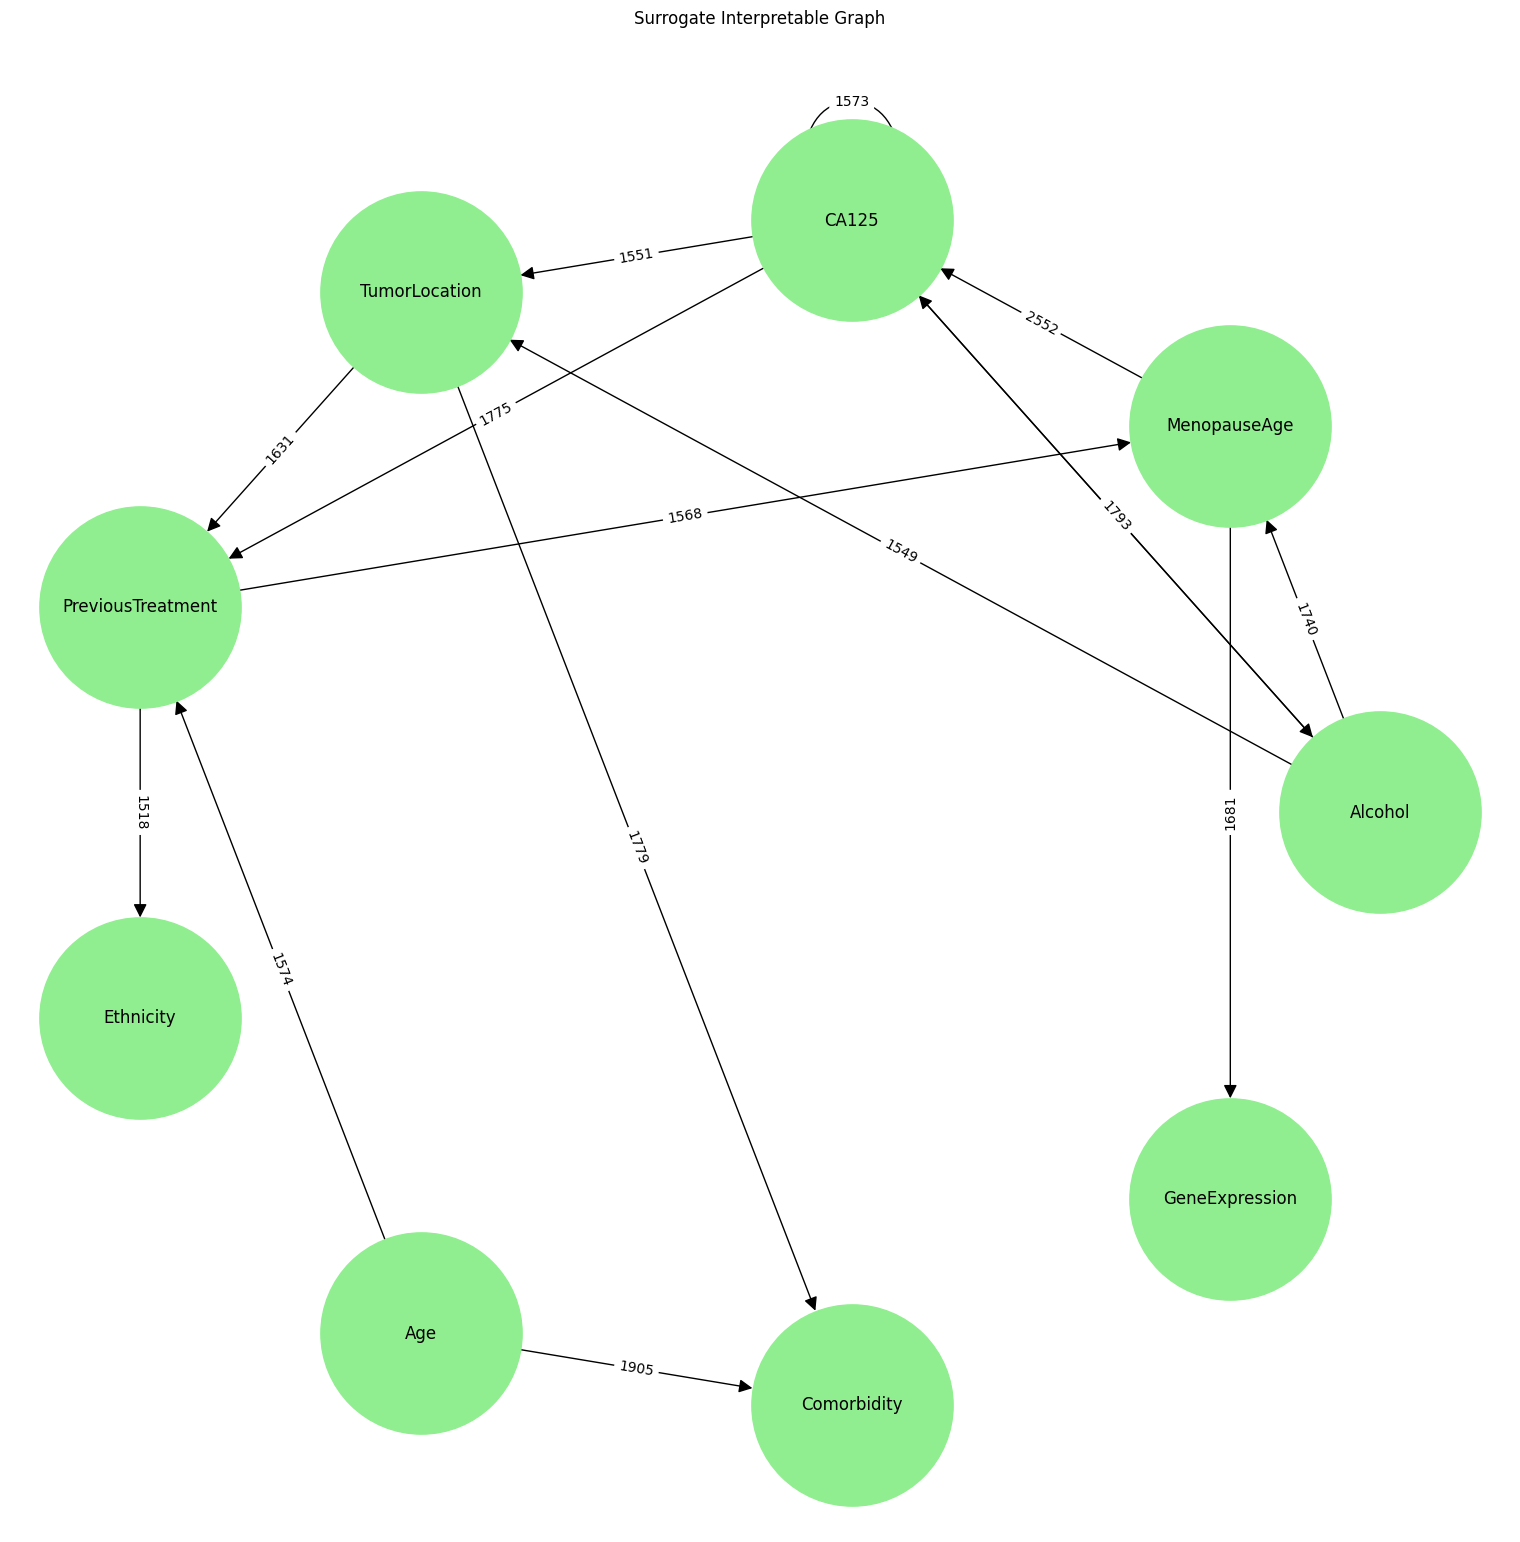

In [27]:
from sigRF.SIG import create_sig_optimized
sig_optimized  = create_sig_optimized(columns=X.columns, encoded_rules=encoded_rules, max_edges=15)

In [28]:
sig_optimized.remove_edge('CA125', 'CA125')

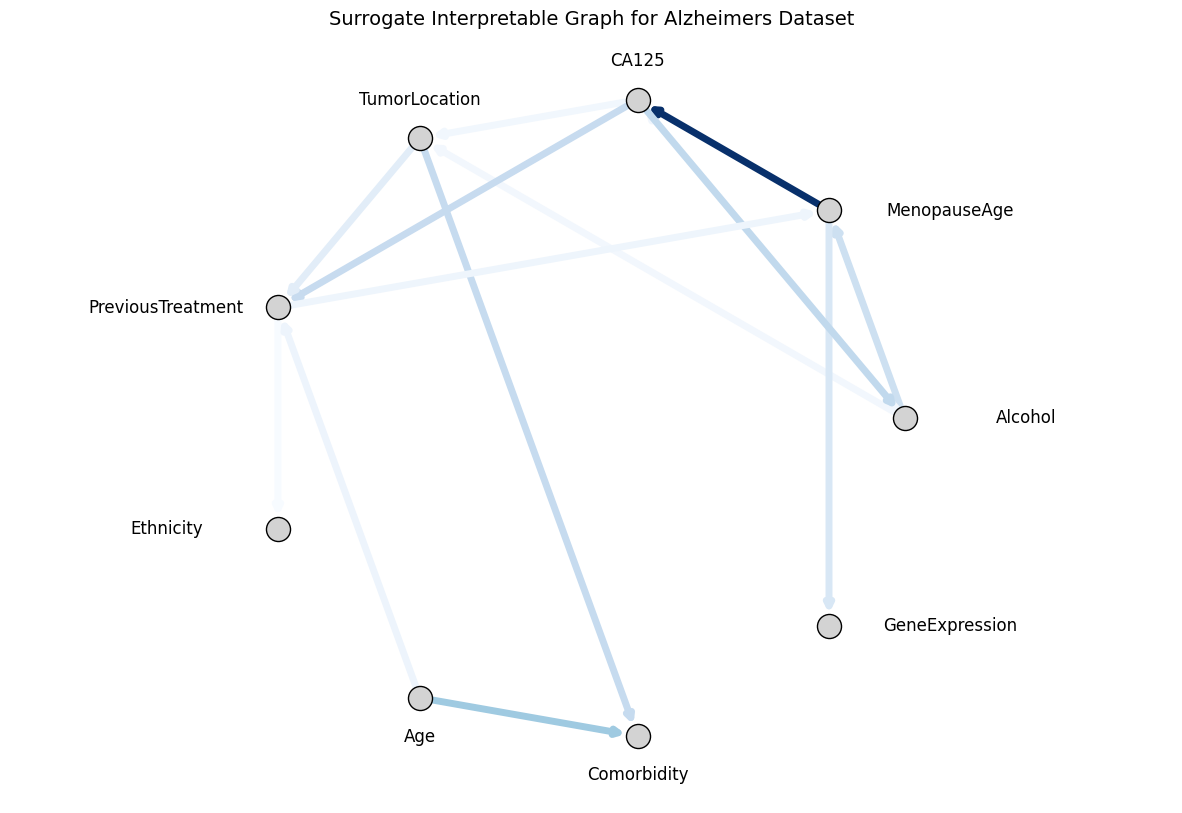

In [29]:
from sigRF.SIG import beautify
beautify(sig_optimized)

## Interpretation of the SIG and verified by a domain-expert

| Symptom Chain | Does it validate/support ovarian cancer diagnosis? | Explanation | Citations |
|---|---|---|---|
| Age → Comorbidity | **Yes (partially)** | Increasing age is the strongest risk factor for ovarian cancer. Certain comorbidities (e.g., endometriosis, breast/colon cancer) further increase risk. However, not all comorbidities are relevant—only specific ones like prior hormone-related or gynecological cancers are established risk factors. | [4][6][7][8][9] |
| Age → Previous Treatment → Ethnicity | **Partially** | Age and some previous treatments (e.g., for breast/uterine cancer) increase risk. Ethnicity has a nuanced effect: Ashkenazi Jewish and Eastern European backgrounds have higher BRCA mutation prevalence, but among Hispanic, Caucasian, African, and Asian groups, risk differences are less pronounced, though some studies suggest White women have slightly higher risk. | [4][6][7][8][9] |
| Age → Previous Treatment → Menopause Age → Alcohol | **Weak** | Age and late menopause increase risk. Previous treatment (especially for hormone-related cancers) is a factor. Alcohol is not a well-established risk factor for ovarian cancer, so its addition does not significantly validate the chain. | [4][7][8] |
| Age → Previous Treatment → Menopause Age → Gene Expression | **Yes (strong)** | Age, prior cancer treatments, and late menopause are risk factors. Gene expression (e.g., BRCA1/2, Lynch syndrome) is a major determinant of risk, making this chain highly supportive for risk stratification and diagnosis. | [4][6][7][8][9] |
| Age → Previous Treatment → Menopause Age → CA125 → Previous Treatment → Ethnicity | **Yes (strong)** | This chain includes age, prior treatment, late menopause, and CA125 (a key ovarian cancer biomarker). Ethnicity and previous treatments further inform risk, especially in populations with higher genetic predisposition (e.g., Ashkenazi Jewish, some White populations). This chain strongly supports the diagnostic process. | [4][5][6][7][8][9] |
| Age → Previous Treatment → Menopause Age → CA125 → Tumor Location → Comorbidity | **Yes (very strong)** | This sequence combines multiple validated risk factors (age, prior treatment, late menopause), a diagnostic biomarker (CA125), tumor localization (important for staging), and comorbidities (like endometriosis or prior hormone-related cancers). This chain is highly supportive for diagnosis and staging of ovarian cancer. | [3][4][5][6][7][8][9] |

---

### Analysis

- **Age** is the single most important non-modifiable risk factor for ovarian cancer, with risk increasing steeply after menopause[4][7][8].
- **Comorbidities** relevant to ovarian cancer include endometriosis and previous hormone-related cancers (breast, colon)[4][6][9].
- **Previous treatment** for certain cancers (especially breast, uterine, or colon) increases ovarian cancer risk[6][9].
- **Ethnicity**: Ashkenazi Jewish and Eastern European descent are at higher risk due to BRCA mutations. Among Hispanic, Caucasian, African, and Asian groups, risk differences exist but are less dramatic, with White women having a slightly higher risk[6][9].
- **Menopause age**: Late menopause is a risk factor; earlier menopause is protective[4][7][8].
- **Gene expression**: BRCA1/2 and other genetic mutations are among the strongest predictors of ovarian cancer risk[4][6][7][8][9].
- **CA125**: Elevated CA125 is a key biomarker for ovarian cancer diagnosis and monitoring[5].
- **Tumor location**: Important for diagnosis and staging, as ovarian cancer can be primary or metastatic[3].
- **Alcohol**: Not a well-established risk factor for ovarian cancer[4][7][8].

**Conclusion:**  
Chains that integrate age, menopause, previous cancer treatment, genetic risk, CA125, and tumor location are most supportive for diagnosing ovarian cancer. Ethnicity and comorbidities further refine risk, while alcohol use is not a significant factor.

Citations:
[1] https://www.mayoclinic.org/diseases-conditions/ovarian-cancer/symptoms-causes/syc-20375941
[2] https://www.cancer.org/cancer/types/ovarian-cancer/causes-risks-prevention/risk-factors.html
[3] https://gesund.bund.de/en/ovarian-cancer
[4] https://pmc.ncbi.nlm.nih.gov/articles/PMC10477765/
[5] https://sarahcannon.com/blog/entry/understanding-signs-risk-factors-and-diagnostic-tests-for-ovarian-cancer
[6] https://www.cdc.gov/ovarian-cancer/risk-factors/index.html
[7] https://www.cancerresearchuk.org/about-cancer/ovarian-cancer/risks-causes
[8] https://www.ovariancancer.net.au/about-ovarian-cancer/risks-and-causes
[9] https://www.elsevier.es/es-revista-progresos-obstetricia-ginecologia-151-articulo-cancer-ovary-risk-factors-screening-13009712

---